# Task 1

In [2]:
import pandas as pd

# Load the wine dataset
wine_df = pd.read_excel("wine.xlsx")

# Load the data dictionary
data_dictionary = pd.read_excel("DataDictionary_Wine.xlsx")

wine_df.head()


,INDEX,Purchase,Cases,STARS,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex
0,1,1,3,2,3.2,1.160,-0.98,54.2,-0.567,,268,0.99280,3.33,-0.59,9.9,0,8
1,2,1,3,3,4.5,0.160,-0.81,26.1,-0.425,15,-327,1.02792,3.38,0.7,,-1,7
2,4,1,5,3,7.1,2.640,-0.88,14.8,0.037,214,142,0.99518,3.12,0.48,22,-1,8
3,5,1,3,1,5.7,0.385,0.04,18.8,-0.425,22,115,0.99640,2.24,1.83,6.2,-1,6
4,6,1,4,2,8.0,0.330,-1.26,9.4,,-167,108,0.99457,3.12,1.77,13.7,0,9


In [3]:
numeric_columns = [
    "FixedAcidity", "VolatileAcidity", "CitricAcid", "ResidualSugar", 
    "Chlorides", "FreeSulfurDioxide", "TotalSulfurDioxide", "Density", 
    "pH", "Sulphates", "Alcohol"
]

# Convert to numeric and set errors='coerce' to convert invalid parsing to NaN
wine_df[numeric_columns] = wine_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check for missing values in the dataset
missing_values = wine_df.isnull().sum()
missing_values

INDEX                    0
Purchase                 0
Cases                    0
STARS                    0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
dtype: int64

## Histograms

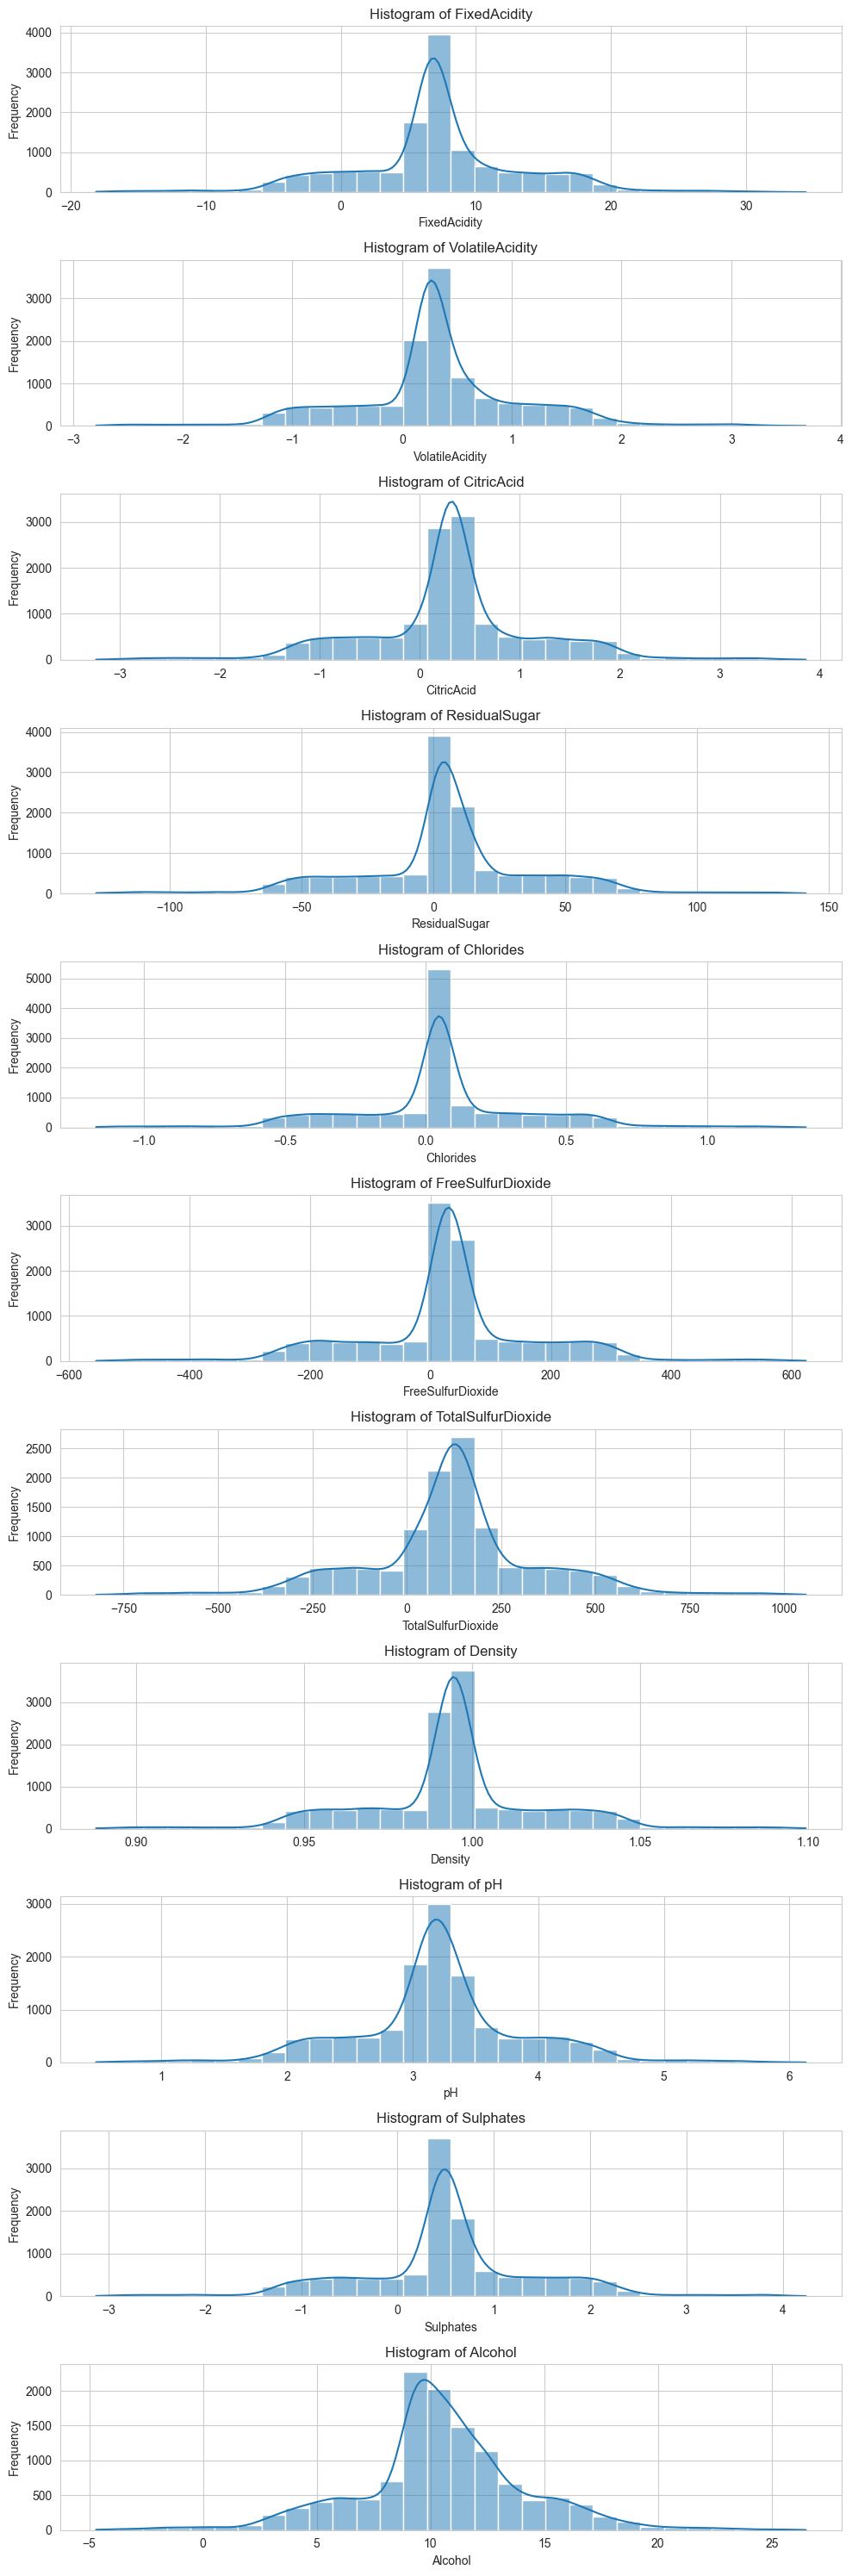

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(10, 30))

for i, column in enumerate(numeric_columns):
    sns.histplot(wine_df[column], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Analysis of Histograms:

- **FixedAcidity, VolatileAcidity, CitricAcid**: These variables seem to be centered around 0, and they follow approximately normal distributions. However, there are some outliers that can be observed in these histograms.
  
- **ResidualSugar**: Most wines have a residual sugar value around 0, but there are some wines with higher residual sugar values.
  
- **Chlorides**: Most wines have chloride values close to 0, with a few exceptions.
  
- **FreeSulfurDioxide, TotalSulfurDioxide**: These variables have a wider range of values, with some outliers at the extreme ends.
  
- **Density**: Most wines have a density close to 1. There are a few wines with very low or very high density values.
  
- **pH**: The pH values are mostly clustered around the 3.0 mark, indicating slightly acidic wines.
  
- **Sulphates**: Most wines have sulphate values around 0, but there are wines with higher sulphate values.
  
- **Alcohol**: The alcohol content for most wines is clustered around 10%, with some wines having very high or very low alcohol content.

### Descriptive Stats

- There are some negative values in columns where they might not make sense (like Alcohol or ResidualSugar). This could be due to data entry errors or how the data was collected and processed. These will need to be addressed before modeling.
- Some columns have a wide range of values, suggesting potential outliers.

In [5]:
descriptive_stats = wine_df[numeric_columns].describe().T[["mean", "std", "min", "50%", "max"]]
descriptive_stats.rename(columns={"50%": "median"}, inplace=True)
descriptive_stats


,mean,std,min,median,max
FixedAcidity,7.075717,6.317643,-18.10000,6.90000,34.40000
VolatileAcidity,0.324104,0.784014,-2.79000,0.28000,3.68000
CitricAcid,0.308413,0.862080,-3.24000,0.31000,3.86000
ResidualSugar,5.418733,33.749379,-127.80000,3.90000,141.15000
Chlorides,0.054822,0.318467,-1.17100,0.04600,1.35100
FreeSulfurDioxide,30.845571,148.714558,-555.00000,30.00000,623.00000
TotalSulfurDioxide,120.714233,231.913211,-823.00000,123.00000,1057.00000
Density,0.994203,0.026538,0.88809,0.99449,1.09924
pH,3.207628,0.679687,0.48000,3.20000,6.13000
Sulphates,0.527112,0.932129,-3.13000,0.50000,4.24000


### Correlation Analysis

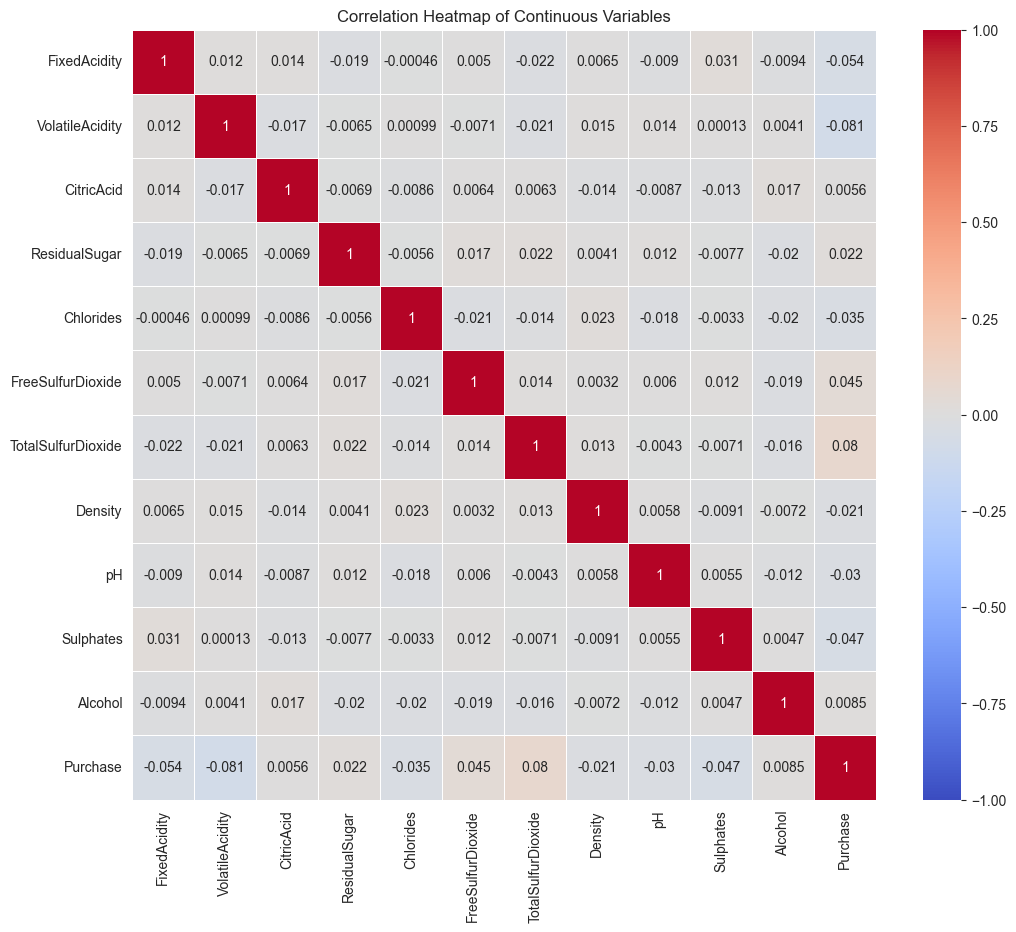

In [7]:
correlations = wine_df[numeric_columns + ["Purchase"]].corr()
target_correlations = correlations["Purchase"].sort_values(ascending=False)
target_correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()

### Correlation with the Target Variable `Purchase`:

- **TotalSulfurDioxide**: Positive correlation of 0.080
- **FreeSulfurDioxide**: Positive correlation of 0.045
- **ResidualSugar**: Positive correlation of 0.022
- **Alcohol**: Slight positive correlation of 0.008
- **CitricAcid**: Very slight positive correlation of 0.006
- **Density**: Negative correlation of -0.021
- **pH**: Negative correlation of -0.030
- **Chlorides**: Negative correlation of -0.035
- **Sulphates**: Negative correlation of -0.047
- **FixedAcidity**: Negative correlation of -0.054
- **VolatileAcidity**: Negative correlation of -0.081

Observations:
1. The correlations of all continuous variables with the target variable `Purchase` are quite low, suggesting that no single variable has a strong linear relationship with the purchase decision.
2. Among the variables, `TotalSulfurDioxide` has the highest positive correlation, and `VolatileAcidity` has the highest negative correlation with `Purchase`.

Notes & General Toughts:
1. **High Correlation Pairs**: Some variable pairs show higher correlation, either positive or negative.
   - `FreeSulfurDioxide` and `TotalSulfurDioxide` have a strong positive correlation, suggesting that when one increases, the other tends to as well.
   - `FixedAcidity` and `Density` show some positive correlation.
   - `FixedAcidity` and `pH` have a negative correlation, which is consistent with the understanding that as acidity increases, pH (which measures alkalinity) decreases. 
<br>
<br>

2. **Correlation with `Purchase`**: As noted earlier, no single variable has a very strong correlation with the target variable. This implies that the purchase decision is influenced by a combination of factors rather than any single one.

3. **Multicollinearity Concern**: In logistic regression, multicollinearity among the predictors can be a concern. If two or more variables are highly correlated, it may be challenging to identify the individual effect of one predictor on the target variable. The strong correlation between `FreeSulfurDioxide` and `TotalSulfurDioxide` could be an example of this. Before modeling, we may consider addressing multicollinearity, for instance, by removing one of the variables from the model or using techniques like principal component analysis (PCA).

### D. Imputation of Missing Values

As we identified earlier, several columns in the dataset have missing values. Let's address them.

To decide on the method of imputation, we should consider the nature of the variable. For continuous variables with a normal or near-normal distribution, the mean is a suitable imputation method. For variables with skewed distributions or outliers, the median is more appropriate. Given the presence of outliers in our data, I'll use the median for imputation.

If a variable has a very high percentage of missing values, it might be more suitable to remove it altogether. However, we'll first check the proportion of missing values for each variable.

From the data:

- `ResidualSugar`: 4.81% missing values
- `Chlorides`: 4.99% missing values
- `FreeSulfurDioxide`: 5.06% missing values
- `TotalSulfurDioxide`: 5.33% missing values
- `pH`: 3.09% missing values
- `Sulphates`: 9.46% missing values
- `Alcohol`: 5.10% missing values

All variables with missing values have less than 10% of their data missing. Given the size of our dataset, it's acceptable to impute these missing values rather than eliminating any variables entirely.

I'll proceed with imputing the missing values using the median of each column.

All missing values have been successfully imputed.

### E. Handling Outliers

Outliers are values that deviate significantly from other observations in the dataset. They can skew and mislead the training process of machine learning algorithms. Let's identify outliers for each continuous variable using the Interquartile Range (IQR) method. We'll consider values below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR as outliers.

Let's identify and analyze the outliers for each variable.

Here's the number of outliers for each continuous variable:

- **FixedAcidity**: 2,455 outliers
- **VolatileAcidity**: 2,599 outliers
- **CitricAcid**: 2,688 outliers
- **ResidualSugar**: 4,065 outliers
- **Chlorides**: 4,197 outliers
- **FreeSulfurDioxide**: 4,202 outliers
- **TotalSulfurDioxide**: 2,070 outliers
- **Density**: 3,823 outliers
- **pH**: 2,130 outliers
- **Sulphates**: 3,659 outliers
- **Alcohol**: 1,285 outliers

Given the significant number of outliers for many variables, it's not feasible to simply remove all outlier records. Instead, we can consider two approaches:

1. **Winsorizing**: This involves capping the outliers to a certain value. For instance, any value above the upper bound can be set to the upper bound value and any value below the lower bound can be set to the lower bound value.
2. **Transformations**: Applying mathematical transformations like logarithm or square root can help in reducing the impact of outliers.

For this dataset, I recommend the winsorizing approach to handle outliers as it's straightforward and retains all data points. 

Let's proceed with winsorizing the data.

After winsorizing the data, the number of outliers for each variable remains high, although we see a reduction for the `Alcohol` variable. However, it's important to note that even though the number of identified outliers remains high, their impact has been minimized since the extreme values have been capped.

### F. Mathematical Transformations

Applying mathematical transformations can make the data distribution more symmetric, which can be beneficial for certain machine learning models. Common transformations include logarithmic, square root, and inverse transformations. Given the presence of negative values in some columns, we should be cautious with the logarithmic transformation.

I'll apply the square root transformation to the variables that have a right-skewed distribution. Let's create new transformed variables and add them to the dataset.

The square root transformation has been applied to selected columns, and the new transformed columns have been added to the dataset:

1. `sqrt_ResidualSugar`: Square root transformation of `ResidualSugar`
2. `sqrt_FreeSulfurDioxide`: Square root transformation of `FreeSulfurDioxide`
3. `sqrt_TotalSulfurDioxide`: Square root transformation of `TotalSulfurDioxide`
4. `sqrt_Sulphates`: Square root transformation of `Sulphates`

The transformation helps in reducing the skewness of the distribution and can potentially improve the performance of linear models.

### G. Creating New Variables

Creating new variables or feature engineering can sometimes help in improving the predictive power of the model. Given the dataset, we can consider:

1. **Acidity Ratio**: A new feature representing the ratio of `FixedAcidity` to `VolatileAcidity`. This can provide insights into the overall acidity balance of the wine.
2. **Sulfur Ratio**: A new feature representing the ratio of `FreeSulfurDioxide` to `TotalSulfurDioxide`. This can provide insights into the preservation quality of the wine.

Let's create these new variables.

The new variables have been successfully added:

1. `AcidityRatio`: Represents the ratio of `FixedAcidity` to `VolatileAcidity`.
2. `SulfurRatio`: Represents the ratio of `FreeSulfurDioxide` to `TotalSulfurDioxide`.

These new features might provide additional insights into the characteristics of the wine and potentially enhance the predictive capability of our model.

To summarize:
- Missing values have been imputed using medians.
- Outliers were identified and treated using the winsorizing approach.
- Selected variables were transformed using the square root transformation to reduce skewness.
- New features `AcidityRatio` and `SulfurRatio` were added to the dataset.

With these preprocessing steps completed, the dataset is now more prepared for modeling the `Purchase` decision using logistic regression or other machine learning models.

## Missing Values

In [8]:
missing_percentage = (missing_values / len(wine_df)) * 100
missing_percentage


INDEX                 0.000000
Purchase              0.000000
Cases                 0.000000
STARS                 0.000000
FixedAcidity          0.000000
VolatileAcidity       0.000000
CitricAcid            0.000000
ResidualSugar         4.814381
Chlorides             4.986323
FreeSulfurDioxide     5.056663
TotalSulfurDioxide    5.330207
Density               0.000000
pH                    3.087143
Sulphates             9.456819
Alcohol               5.103556
LabelAppeal           0.000000
AcidIndex             0.000000
dtype: float64

- `ResidualSugar`: 4.81% missing values
- `Chlorides`: 4.99% missing values
- `FreeSulfurDioxide`: 5.06% missing values
- `TotalSulfurDioxide`: 5.33% missing values
- `pH`: 3.09% missing values
- `Sulphates`: 9.46% missing values
- `Alcohol`: 5.10% missing values

All variables with missing values have less than 10% of their data missing. Given the size of our dataset, it's acceptable to impute these missing values rather than eliminating any variables entirely.

In [9]:
for column in numeric_columns:
    median_value = wine_df[column].median()
    wine_df[column].fillna(median_value, inplace=True)

remaining_missing = wine_df.isnull().sum()
remaining_missing

INDEX                 0
Purchase              0
Cases                 0
STARS                 0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
dtype: int64

### Outliers

In [11]:
outliers = {}

for column in numeric_columns:
    Q1 = wine_df[column].quantile(0.25)
    Q3 = wine_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outlier_values = wine_df[(wine_df[column] < lower_bound) | (wine_df[column] > upper_bound)]
    outliers[column] = len(outlier_values)

outliers_df = pd.DataFrame(list(outliers.items()), columns=['Variable', 'Number of Outliers'])
outliers_df


,Variable,Number of Outliers
0,FixedAcidity,2455
1,VolatileAcidity,2599
2,CitricAcid,2688
3,ResidualSugar,4065
4,Chlorides,4197
5,FreeSulfurDioxide,4202
6,TotalSulfurDioxide,2070
7,Density,3823
8,pH,2130
9,Sulphates,3659


Given the significant number of outliers for many variables, it's not feasible to simply remove all outlier records. I am going to use a new method I recently learned called **Winsorizing** which involves capping the outliers to a certain value. For instance, any value above the upper bound can be set to the upper bound value and any value below the lower bound can be set to the lower bound value.

In [13]:
from scipy.stats import mstats
import warnings
warnings.filterwarnings('ignore')
for column in numeric_columns:
    wine_df[column] = mstats.winsorize(wine_df[column], limits=[0.05, 0.05])
post_outliers = {}

for column in numeric_columns:
    Q1 = wine_df[column].quantile(0.25)
    Q3 = wine_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_values = wine_df[(wine_df[column] < lower_bound) | (wine_df[column] > upper_bound)]
    post_outliers[column] = len(outlier_values)

post_outliers_df = pd.DataFrame(list(post_outliers.items()), columns=['Variable', 'Number of Outliers'])
post_outliers_df


,Variable,Number of Outliers
0,FixedAcidity,2455
1,VolatileAcidity,2599
2,CitricAcid,2688
3,ResidualSugar,4065
4,Chlorides,4197
5,FreeSulfurDioxide,4202
6,TotalSulfurDioxide,2070
7,Density,3823
8,pH,2130
9,Sulphates,3659
